## Start Feature Extraction from the collected Dataset

In [1]:
import os
import pandas as pd
import librosa

import numpy as np
import matplotlib.pyplot as plt

os.chdir('../')

In [4]:
import torch
torch.cuda.is_available()

True

In [19]:
file_path = "data//external//processed//"
meta_data = pd.read_csv("data//meta_data.csv")

In [20]:
## if this doesn't hold .. some deep problem we gotta fix my myan
assert all(meta_data.start_time.isna() == meta_data.end_time.isna())

In [25]:
meta_data['label'] = ~meta_data.start_time.isna()
meta_data['label'] = meta_data['label'].astype(int) 

In [26]:
meta_data

,filename,start_time,end_time,label
0,0.wav,NaN,NaN,0
1,1.wav,2060.135706,2768.135706,1
2,2.wav,5898.247361,6653.247361,1
3,3.wav,NaN,NaN,0
4,4.wav,NaN,NaN,0
...,...,...,...,...
1995,1995.wav,NaN,NaN,0
1996,1996.wav,NaN,NaN,0
1997,1997.wav,141.648704,814.648704,1
1998,1998.wav,1940.152564,2683.152564,1


In [27]:
def get_melspectrogram_db(file_path, sr=None, n_fft=2048, hop_length=512, n_mels=128, fmin=20, fmax=8300, top_db=80):
    wav,sr = librosa.load(file_path,sr=sr)
    spec=librosa.feature.melspectrogram(wav, sr=sr, n_fft=n_fft,
                hop_length=hop_length,n_mels=n_mels,fmin=fmin,fmax=fmax)
    spec_db=librosa.power_to_db(spec,top_db=top_db)
    return spec_db

def spec_to_image(spec, eps=1e-6):
  mean = spec.mean()
  std = spec.std()
  spec_norm = (spec - mean) / (std + eps)
  spec_min, spec_max = spec_norm.min(), spec_norm.max()
  spec_scaled = 255 * (spec_norm - spec_min) / (spec_max - spec_min)
  spec_scaled = spec_scaled.astype(np.uint8)
  return spec_scaled

In [52]:
from pydub.playback import play
from pydub import AudioSegment

In [53]:
pos_example = meta_data[meta_data.label == 1].sample()
neg_example = meta_data[meta_data.label == 0].sample()


pos_sound = AudioSegment.from_wav(os.path.join( file_path , pos_example.filename.item() ))
neg_sound = AudioSegment.from_wav(os.path.join( file_path , neg_example.filename.item()))

In [55]:
## playing positive example
play( pos_sound )

In [56]:
## playing negative example
play( neg_sound )

In [57]:
mel_spec_pos = get_melspectrogram_db( os.path.join( file_path , pos_example.filename.item() ) , 44100  )
mel_spec_neg = get_melspectrogram_db( os.path.join( file_path , neg_example.filename.item() ) , 44100  )

In [58]:
mel_spec_pos.shape , mel_spec_neg.shape

((128, 690), (128, 690))

In [60]:
pos_example

,filename,start_time,end_time,label
839,839.wav,4745.248981,5430.248981,1


In [65]:
potential_range_in_freq_domain = 690 * pos_example.start_time.item() / 8000 , 690 * pos_example.end_time.item() / 8000

In [136]:
class PlotHelp(object):
    def __init__( self , pos_examples , neg_examples , pos_examples_ranges=None ):

        self.positive_examples = pos_examples
    

        self.negative_examples = neg_examples
        
        self.potential_labels = pos_examples_ranges
        # if len(self.potential_labels) == 1:
        #     self.potential_labels = [self.potential_labels]

    def plot_pos( self ):
        nrows = len(self.positive_examples)
        ncols = 1

        fig, ax = plt.subplots(nrows , ncols)
        plt.figure( figsize = ( 24 * nrows , 12 ) )

        if nrows == 1:
            ax.imshow(  self.positive_examples[0]  )

            start , end = self.potential_labels[0]
            ax.axvline( start , color = 'r' )
            ax.axvline( end , color = 'r')

            ax.set_title('Positive Examples')
            plt.show()

        else:
            for row in range(nrows):
                ax[row].imshow(  self.positive_examples[row]  )
                if self.potential_labels :

                    start , end = self.potential_labels[row]

                    ax[row].axvline( start , color = 'r' )
                    ax[row].axvline( end , color = 'r')

            # ax.set_title('Positive Examples')    
            plt.show()
                


        def plot_neg( self ):
            pass    

        def plot_both( self ):
            pass

plot_help = PlotHelp( [mel_spec_pos, mel_spec_pos , mel_spec_pos] , [mel_spec_neg] , [potential_range_in_freq_domain,potential_range_in_freq_domain,potential_range_in_freq_domain]  )

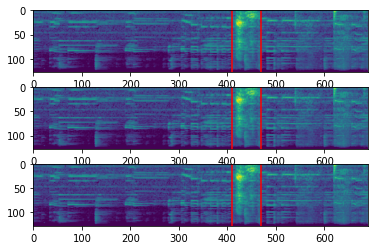

<Figure size 5184x864 with 0 Axes>

In [137]:
plot_help.plot_pos()

In [ ]:
fig = plt.figure(figsize=(24, 12))

    plt.subplot(2, 1, 1)
    plt.title( 'Positive example' )
    plt.axvline(potential_range_in_freq_domain[0] , linestyle='dashed' , color = 'red' , linewidth = 2 )
    plt.axvline(potential_range_in_freq_domain[1] , linestyle='dashed' , color = 'red' , linewidth = 2 )
    plt.axvline()
    plt.imshow(mel_spec_pos)

    plt.subplot(2, 1, 2)
    plt.title('negative example')
    plt.imshow(mel_spec_neg)

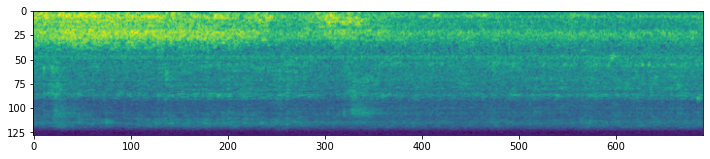

In [10]:
mel_spec_norm = spec_to_image(mel_spec) / 255
plt.figure(figsize=(12, 4))
plt.imshow( mel_spec_norm)

In [12]:
wav,sr = librosa.load(os.path.join( file_path , meta_data.iloc[ 24 , 0 ] ) ,sr=44100)
mfcc_feature = librosa.feature.mfcc( wav , sr)

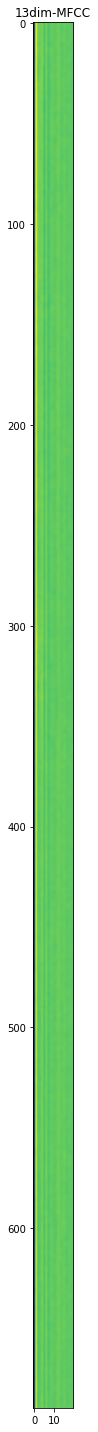

In [24]:
plt.figure(figsize=(4, 20))
plt.imshow(mfcc_feature.T)
plt.title('13dim-MFCC')
plt.tight_layout()

In [2]:
from torch.utils.data import Dataset, DataLoader

ModuleNotFoundError: No module named 'torch'